### Step 1 

Set up enviroment and load in data

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [125]:
df = pd.read_csv('data/train.csv')

print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Set 2

EDA (exploratory data analysis) & Data preparation

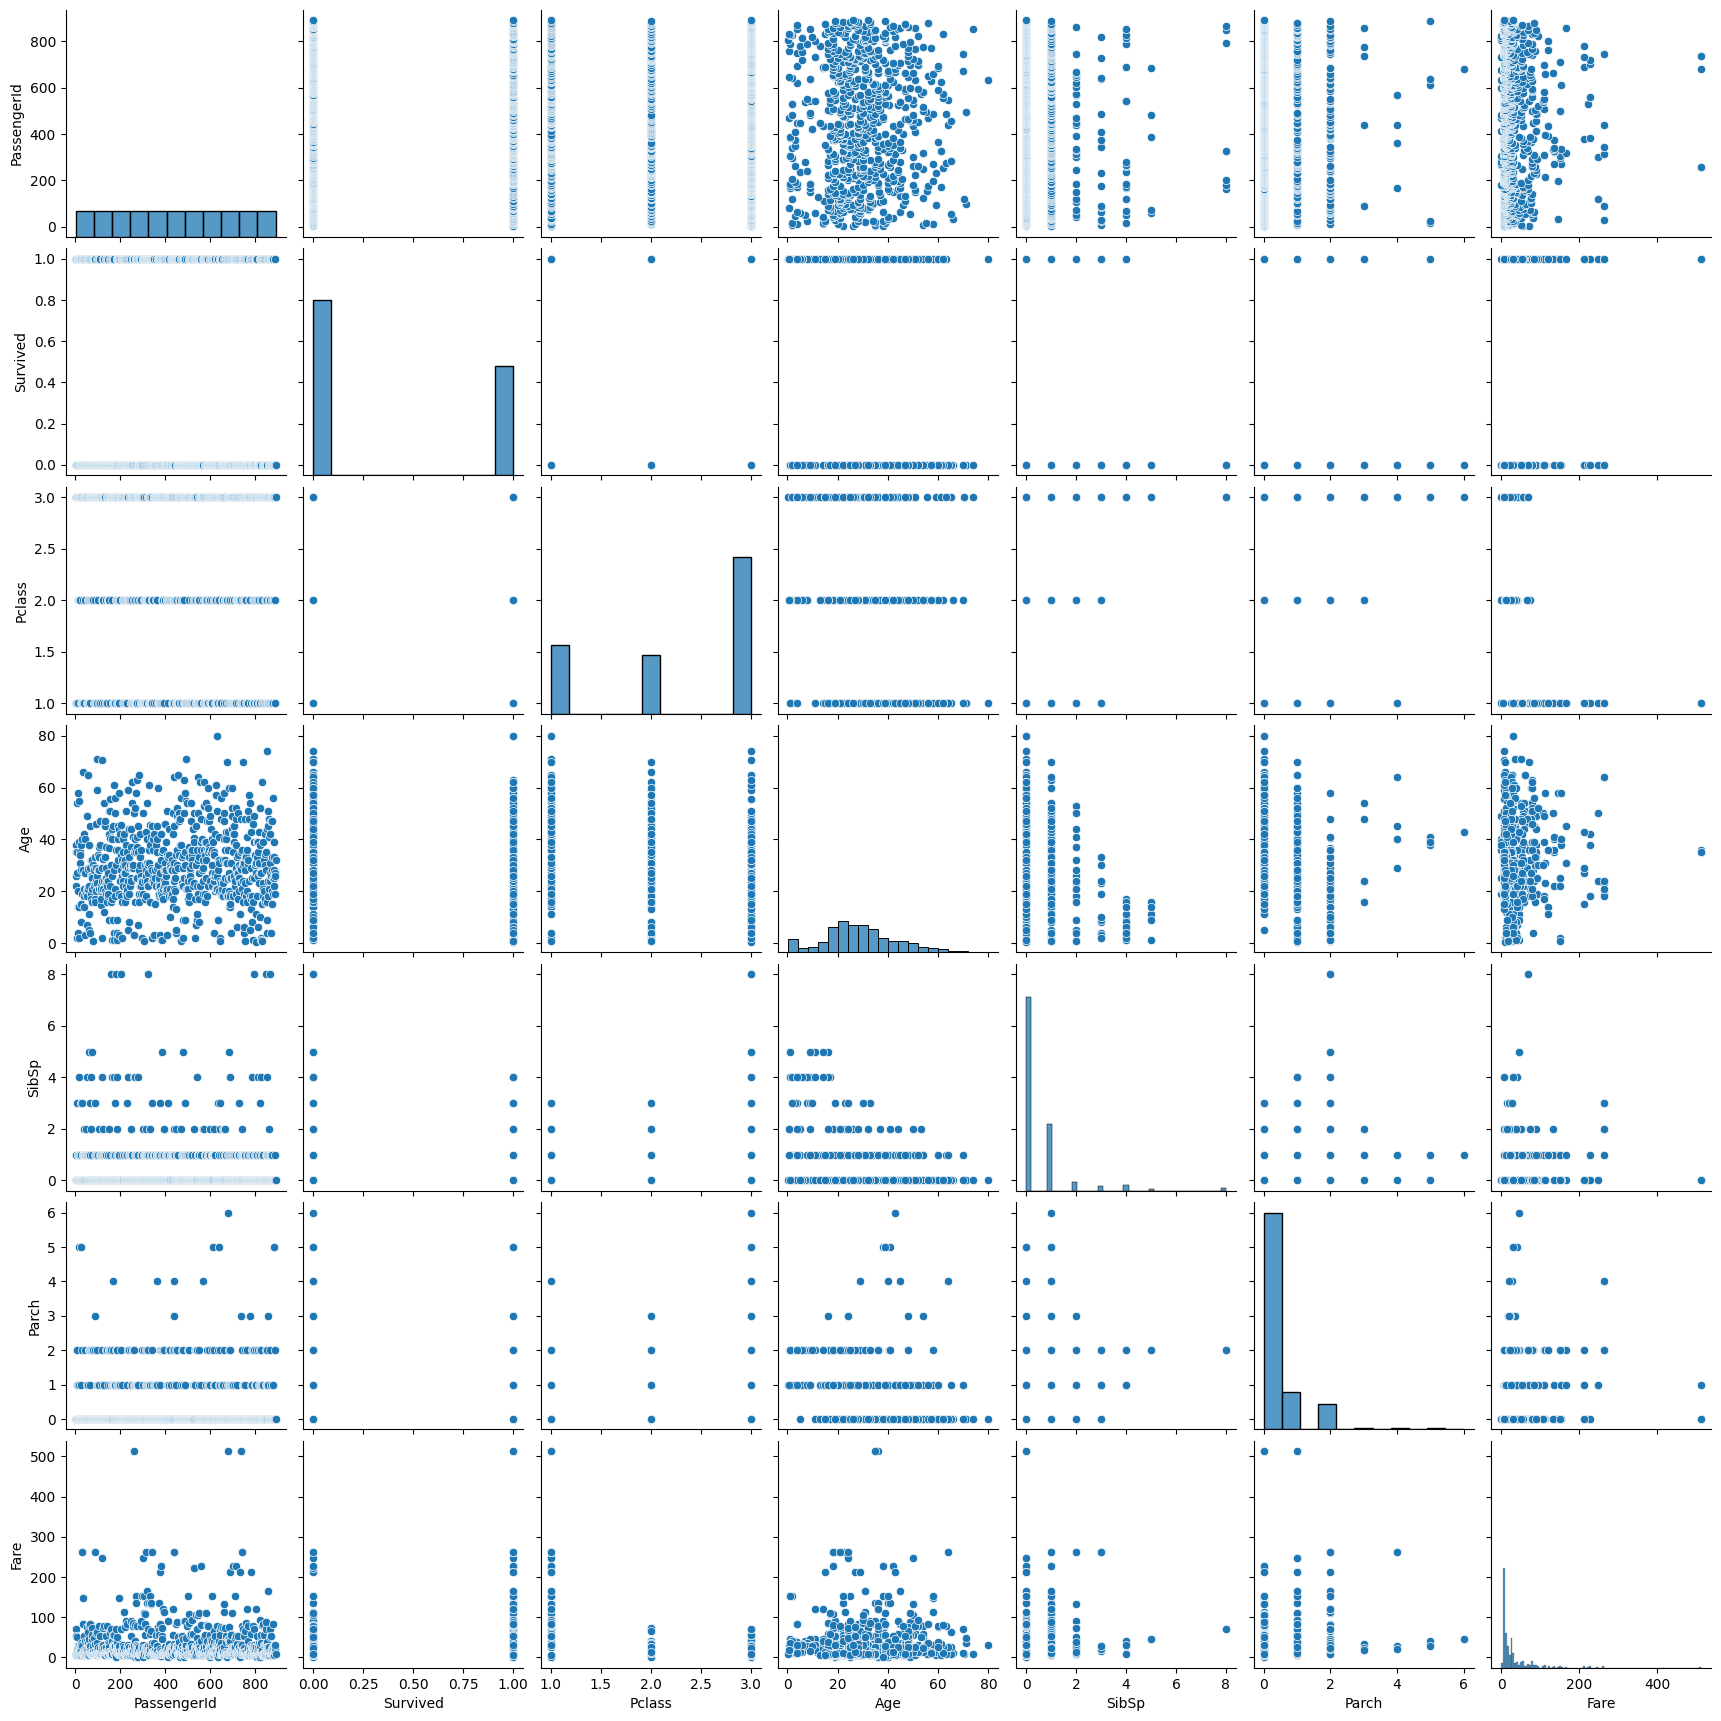

In [126]:
sns.pairplot(df)

In [127]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


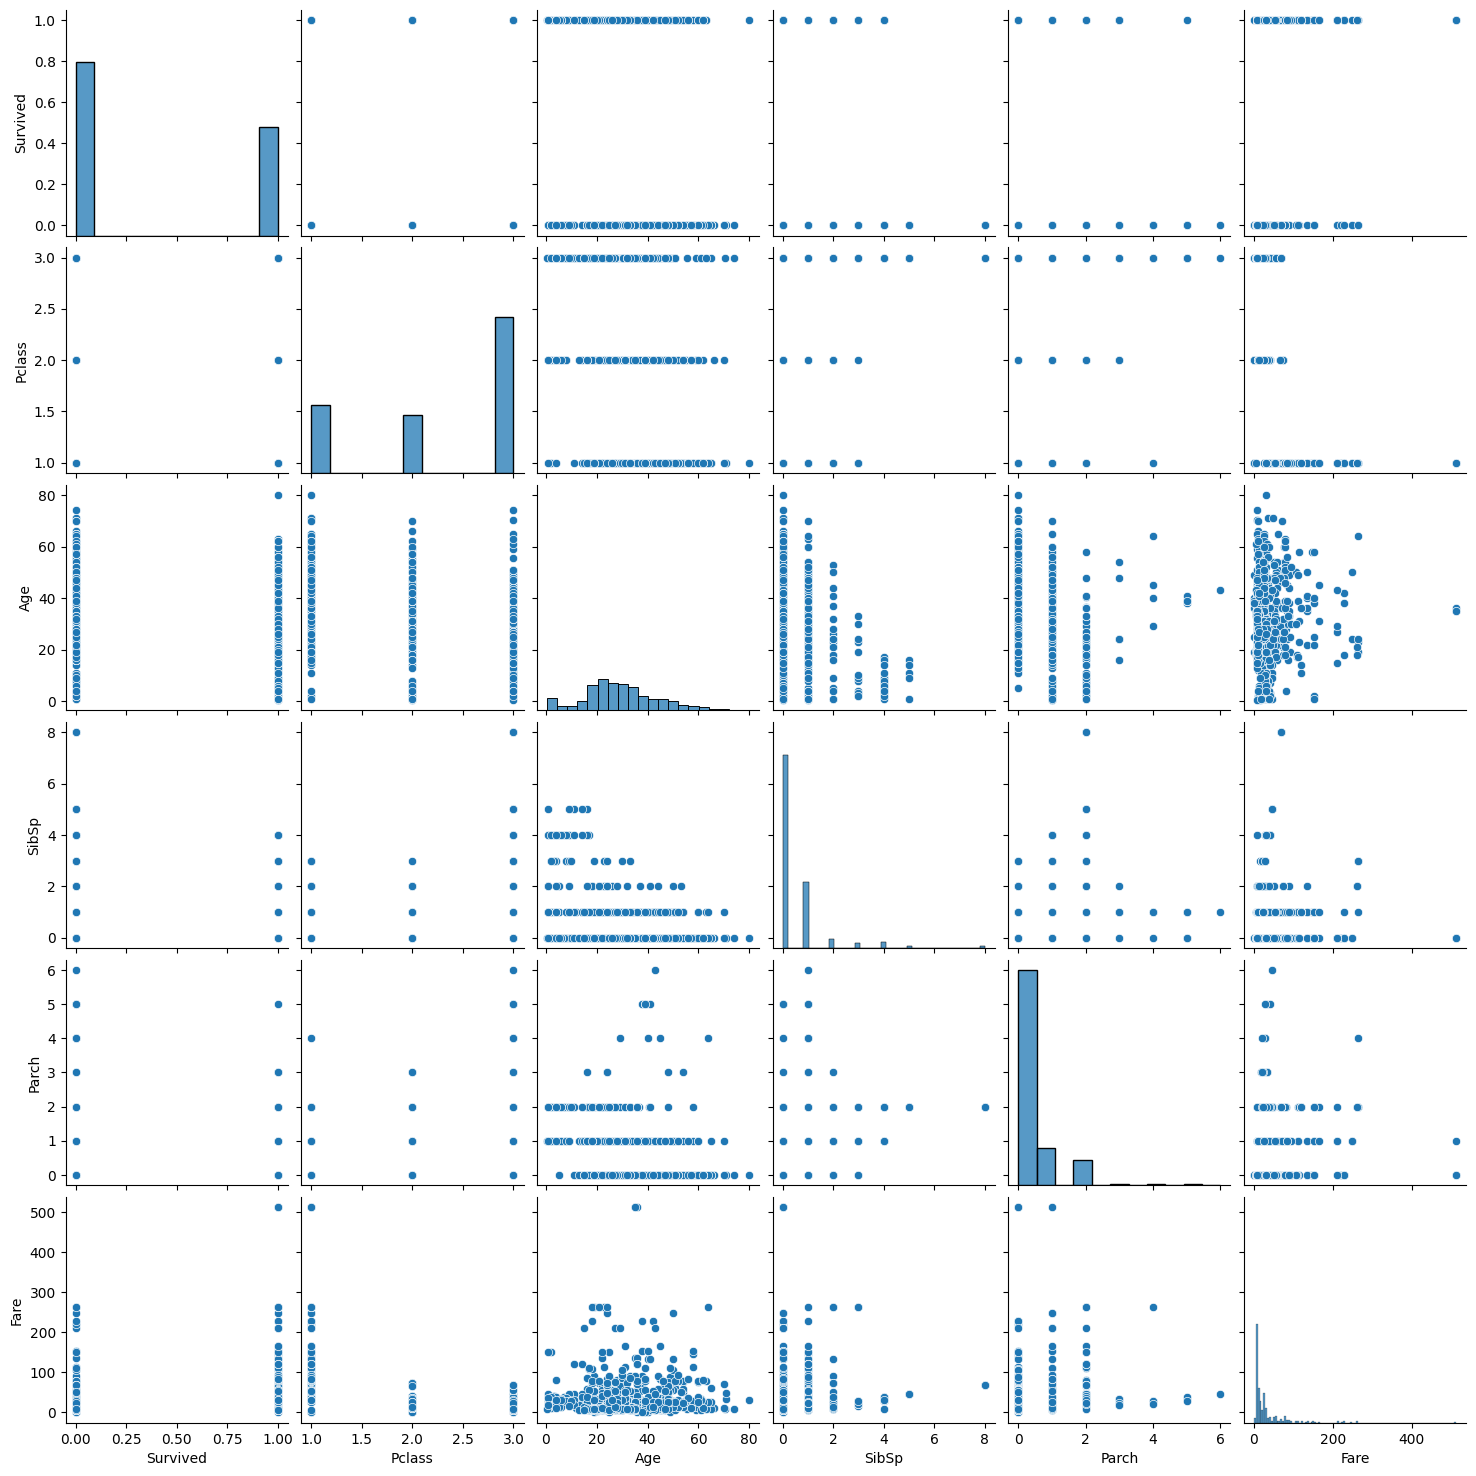

In [129]:
sns.pairplot(df)

In [130]:
df['Dependants'] = df['Parch'] + df['SibSp']

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Dependants
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,NaN,1,2,23.4500,3
889,1,1,male,26.0,0,0,30.0000,0


In [131]:
df = df.drop(['SibSp', 'Parch'], axis=1)

df

,Survived,Pclass,Sex,Age,Fare,Dependants
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,3
889,1,1,male,26.0,30.0000,0


In [132]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

df

,Survived,Pclass,Sex,Age,Fare,Dependants
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0
887,1,1,0,19.0,30.0000,0
888,0,3,0,NaN,23.4500,3
889,1,1,1,26.0,30.0000,0


In [133]:
df['Age'] = df['Age'].fillna((df['Age'].mean()))

df

,Survived,Pclass,Sex,Age,Fare,Dependants
0,0,3,1,22.000000,7.2500,1
1,1,1,0,38.000000,71.2833,1
2,1,3,0,26.000000,7.9250,0
3,1,1,0,35.000000,53.1000,1
4,0,3,1,35.000000,8.0500,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,0
887,1,1,0,19.000000,30.0000,0
888,0,3,0,29.699118,23.4500,3
889,1,1,1,26.000000,30.0000,0


<Axes: >

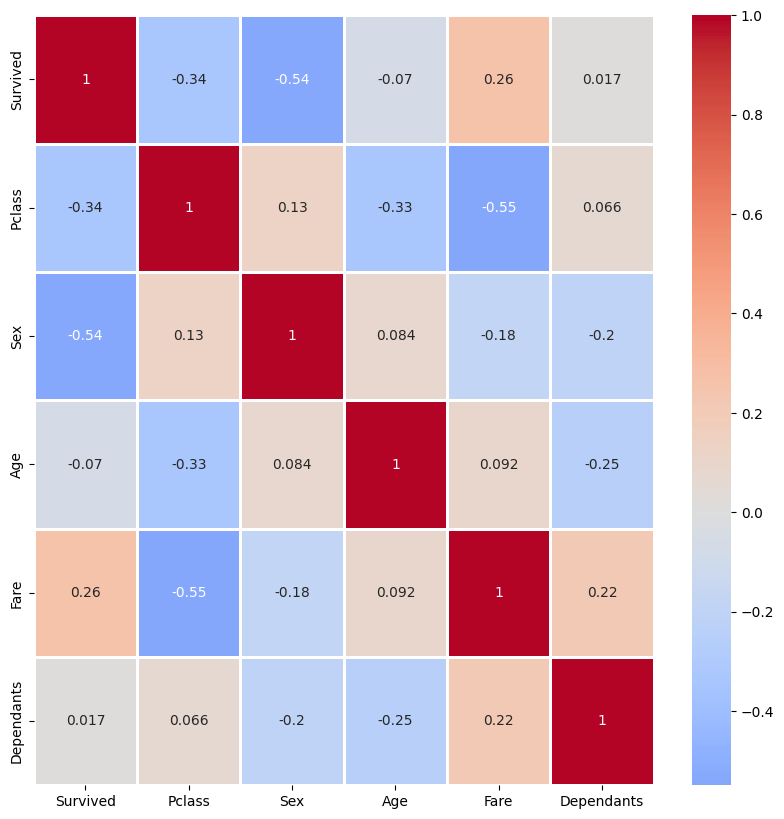

In [134]:
#Creating an axes to draw the heatmeap

fig, ax = plt.subplots(figsize=(10,10))

#plotting the heatmap on the axes

sns.heatmap(df.corr(method='pearson'),
            annot=True,
            center=0.0,
            linewidths=0.8,
            ax=ax,
            cmap='coolwarm')

### Set 3

Building the Model

In [135]:
target = df['Survived']
features = list(set(df.columns) - {'Survived'})

X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.3, random_state=14)



In [136]:
# Decide whether to scale (normalise/standardise) numeric features.

cols_to_scale = ['Pclass','Sex','Age','Fare','Dependants']

In [137]:
# Calling the method twice once for features and once for target

scaler = StandardScaler()
scaler_target = StandardScaler()

# Fitting the scaler on the training features and applying it to both training and test data

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [142]:
cols = ['Dependants','Sex','Age','Fare','Pclass']

lr = LogisticRegression()

lr.fit(X_train[cols],y_train)

LogisticRegression()

In [146]:
y_prd_lr = lr.predict(X_test[cols])

In [147]:
y_prd_lr

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0])

### Set 4

check model's classification report and confusion matrix

In [148]:
print('Logistic Regression')

print(classification_report(y_test, y_prd_lr, target_names=['Did not survive','Survived']))

Logistic Regression
                 precision    recall  f1-score   support

Did not survive       0.84      0.83      0.84       168
       Survived       0.72      0.73      0.73       100

       accuracy                           0.79       268
      macro avg       0.78      0.78      0.78       268
   weighted avg       0.80      0.79      0.79       268



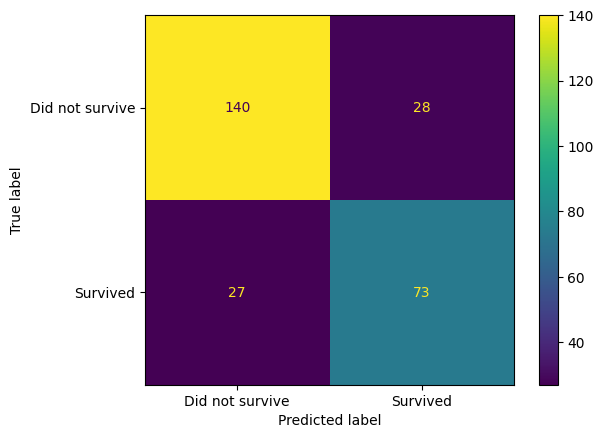

In [ ]:
predictions = y_prd_lr
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Did not survive','Survived'))
disp.plot()